In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [3]:
import os
import pickle
from mix_Network import *
dataset = 'nmnist'

In [4]:
tau = 1
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
loaderhom = hotshom.learning1by1(dataset=dataset)
trainmaphom, loaderhom, _ = hotshom.training(loaderhom, LR=True)
#testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


  8%|▊         | 3/40 [1:17:42<14:59:07, 1458.03s/it]

KeyboardInterrupt: 

[ 0.016651  0.016653  0.016861 ... 12.306583 12.30786  12.308628]


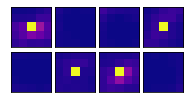

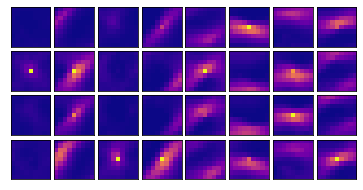

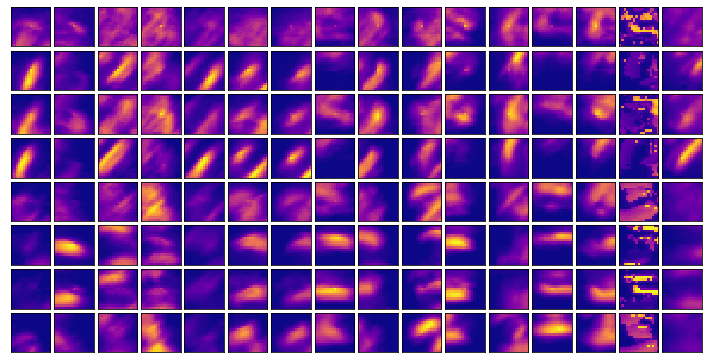

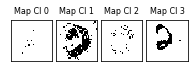

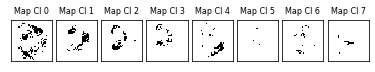

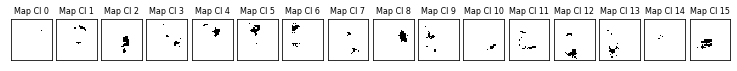

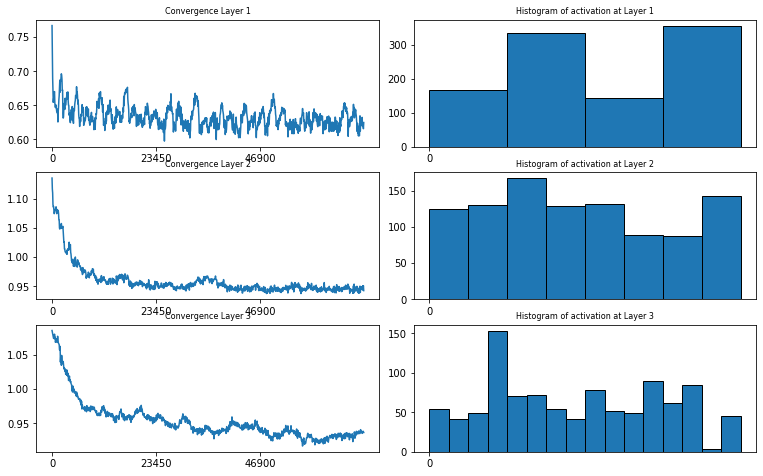

In [5]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

event_to_show, eventnul, eventnull, labelnul, labelnull = LoadNMNIST(
1, 0, 0, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer, homrun=homrun)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

In [9]:
method = 'lagorce'
krnlinit='realrand'
timestr = '2020-11-20'
hom = False
homrun = False

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit,
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit,
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit,
)
Net = Network([L1, L2, L3])



if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+method+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+method+'.pkl'

print(fname)

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun = homrun)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun = homrun)

    #Classif0 = Classifier(
        #event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    #)
    #prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    SaveObject([ClusterLayer], fname)
else:
    ClusterLayer = LoadObject(fname)
    #prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

Records/EXP_03_NMNIST/2020-11-20_hots_0.9ms_lagorce.pkl


PicklingError: Can't pickle <class 'HOTS.KmeansLagorce.KmeansLagorce'>: it's not the same object as HOTS.KmeansLagorce.KmeansLagorce

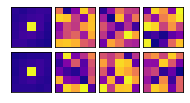

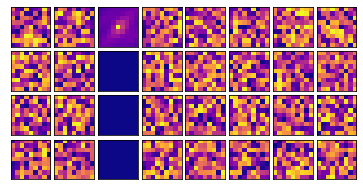

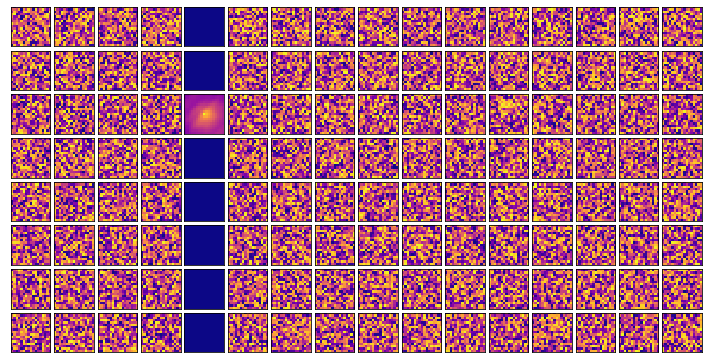

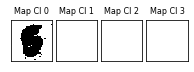

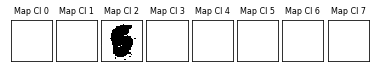

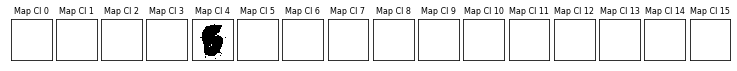

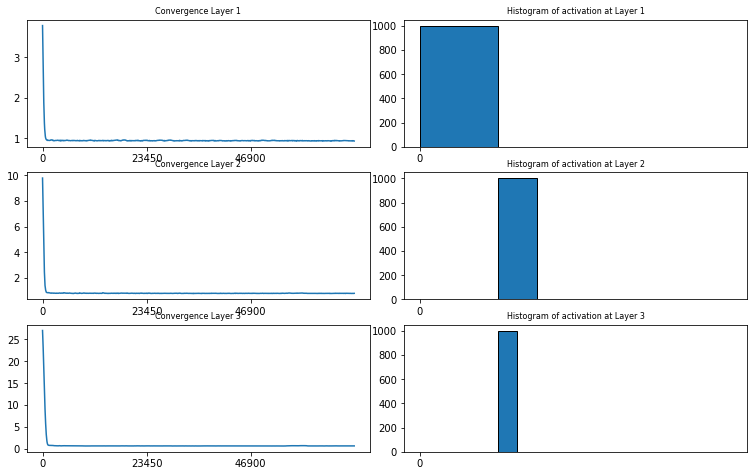

In [10]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

event_to_show, eventnul, eventnull, labelnul, labelnull = LoadNMNIST(
1, 0, 0, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer, homrun=homrun)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

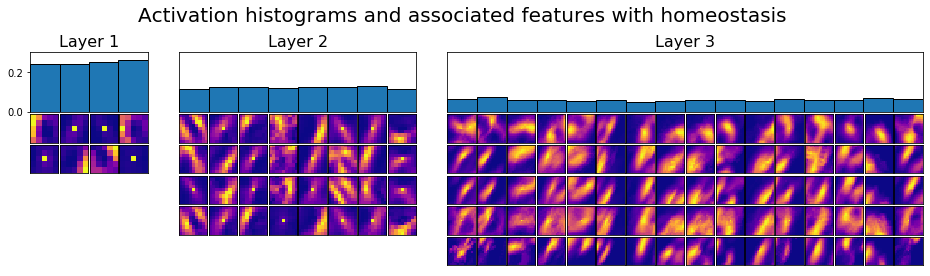

In [12]:
# with homeostasis
timestr = '20201028_xNsur4_'
fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'

ClusterLayer = LoadObject(fname)
DisplayLayer(ClusterLayer, maxpol=5, hisiz=2, yhis=0.3)
plt.savefig('notebooks/fig/layerzhomeo.png', format='png')

In [ ]:
# without homeostasis
timestr = '20201021'
fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'

ClusterLayer, Classif0 = LoadObject(fname)
DisplayLayer(ClusterLayer, maxpol=5, hisiz=2, yhis=0.5)
plt.savefig('notebooks/fig/layerznohomeo.png', format='png')

In [ ]:
homrun = False
event0_o_tr, event0_olz_tr = Net.RunNetwork2(event_tr, NbClusterList=ClusterLayer, homrun=homrun)
        ## Generating histogram for the test samples
event0_o_te, event0_olz_te = Net.RunNetwork2(event_te, NbClusterList=ClusterLayer, homrun=homrun)

In [ ]:
#For the first layer

Classif0 = Classifier(
            event0_olz_tr[0], event0_olz_te[0], TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

In [ ]:
#For the second layer

Classif0 = Classifier(
            event0_olz_tr[1], event0_olz_te[1], TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

In [ ]:
#For the second layer

Classif0 = Classifier(
            event0_olz_tr[2], event0_olz_te[2], TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

array([[0.87771056, 0.51701936, 0.2438351 , 0.2025064 , 0.27918279,
        0.47445205, 0.52982225, 0.25784379, 0.79060457, 0.34398819],
       [0.51644398, 0.21268222, 0.80970987, 0.55244491, 0.41596978,
        0.92063809, 0.81822418, 0.53470449, 0.72020973, 0.10419208],
       [0.65628465, 0.21894354, 0.50687222, 0.05367235, 0.6640252 ,
        0.29592919, 0.08083873, 0.29840703, 0.66790211, 0.95719595],
       [0.38570189, 0.55251052, 0.87115313, 0.9490248 , 0.57502552,
        0.93947831, 0.75489052, 0.80255445, 0.54790418, 0.73430036],
       [0.13095889, 0.79745257, 0.76016837, 0.2058121 , 0.12147812,
        0.07853803, 0.69558934, 0.94053836, 0.76450315, 0.64360927],
       [0.16387251, 0.22479168, 0.37395068, 0.80712141, 0.63870724,
        0.90206358, 0.54416415, 0.0602407 , 0.2104542 , 0.87589476],
       [0.32046297, 0.66917058, 0.93885846, 0.50168372, 0.50120399,
        0.56819422, 0.13425654, 0.1904798 , 0.93025267, 0.19371433],
       [0.58835968, 0.3427729 , 0.1555753